In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [6]:
df=pd.read_csv("D:\Crent User DATA\Downloads\diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
"Exploratory Data Analysis"

In [5]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Now let's check that if our dataset have null values or not
df.isnull().head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
"DATA VISUALIZATION"

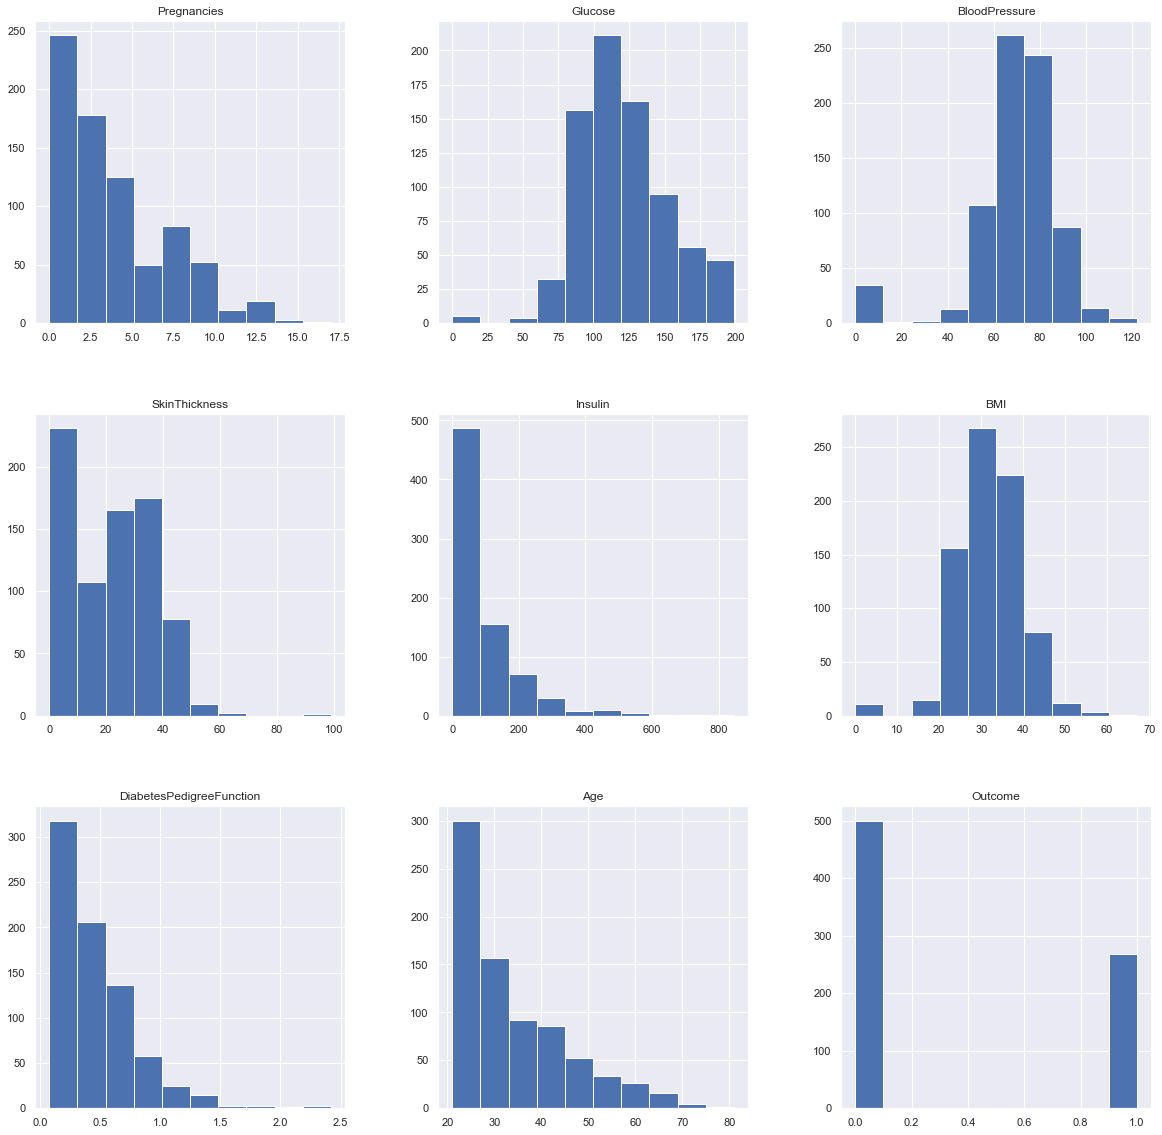

In [9]:
p = df.hist(figsize = (20,20))

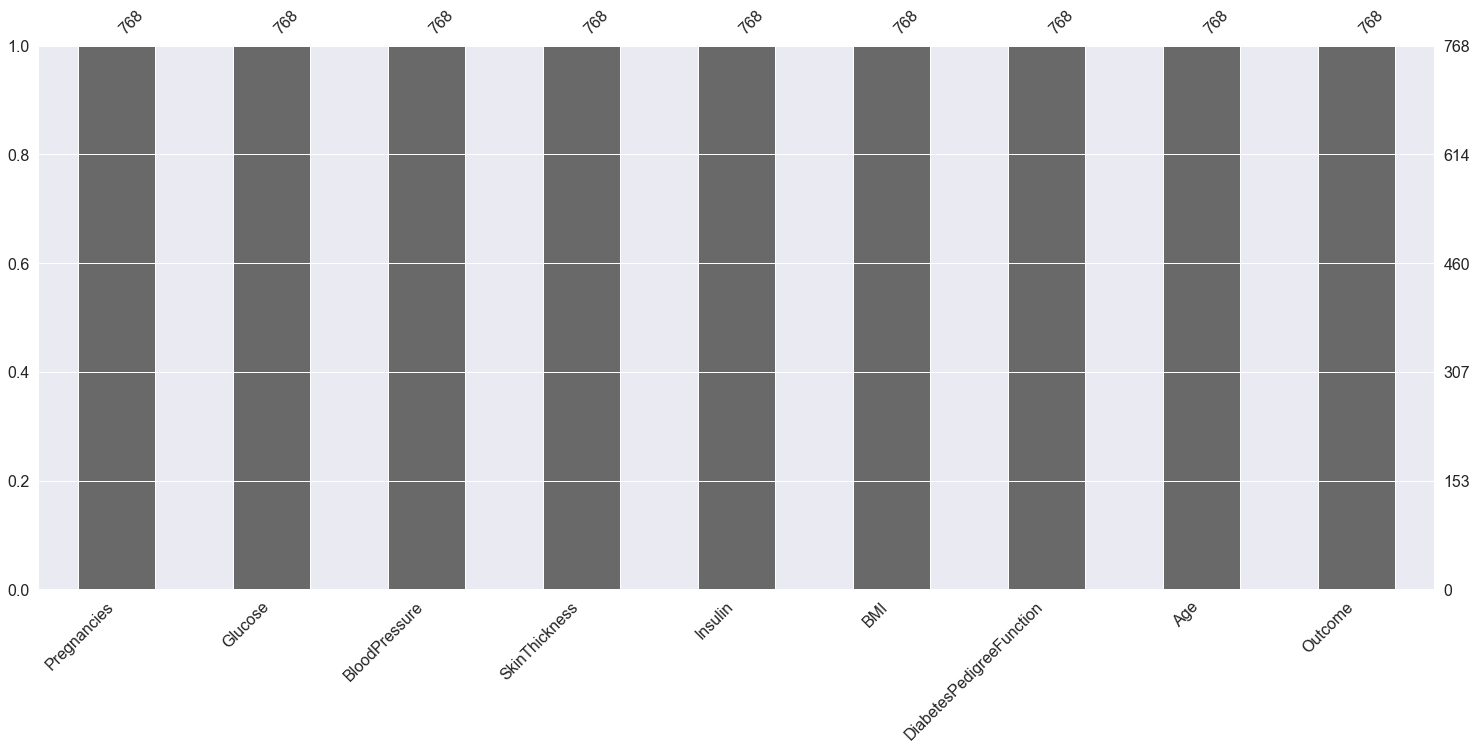

In [13]:
# Plotting Null Count Analysis Plot
p = msno.bar(df)

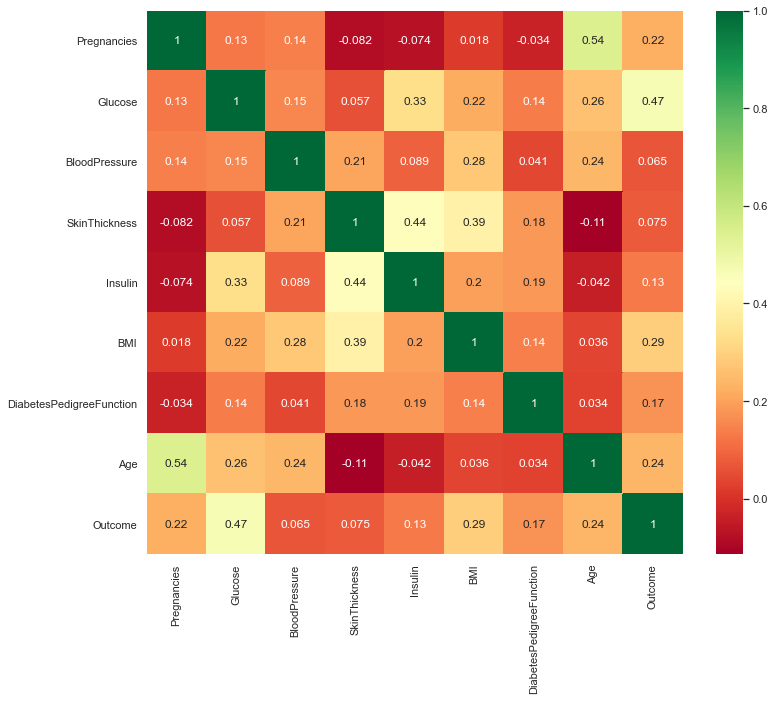

In [26]:
#Correlation between all the features
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [30]:
"Scaling the Data"
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [16]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
"MODEL BUILDING"


In [17]:
#Splitting the dataset

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)


In [21]:
#Check columns with zero values - checking this time so that right data should go for model training

print("Total number of rows: {0}", format(len(df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(df.loc[df['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(df.loc[df['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(df.loc[df['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(df.loc[df['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(df.loc[df['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(df.loc[df['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(df.loc[df['Age']==0])))

Total number of rows: {0} 768
Number of rows missing Pregnancies: {0} 111
Number of rows missing Glucose: {0} 5
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 227
Number of rows missing Insulin: {0} 374
Number of rows missing BMI: {0} 11
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [22]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [23]:
# On training data
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [24]:
predictions = rfc.predict(X_test)

In [25]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7716535433070866


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[136  26]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       162
           1       0.70      0.65      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



In [ ]:
"Conclusion from model building"

In [27]:
#Getting feature importances
rfc.feature_importances_

array([0.08071156, 0.26546   , 0.08905375, 0.07468902, 0.07234267,
       0.16152861, 0.12522158, 0.13099281])

<AxesSubplot:>

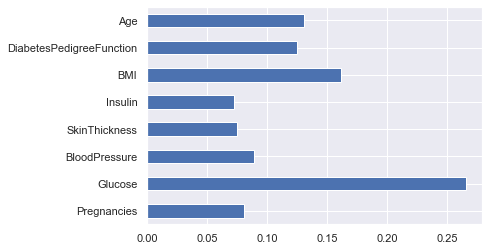

In [28]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [ ]:
"Saving Model"

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [31]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [32]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0], dtype=int64)

In [ ]:
"Conclusion"
"After using all these these patient records, we are able to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.